In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
bias =100
X,y,coef = make_regression(n_features=1,bias=bias,coef=True,noise=25)
y.shape , X.shape

((100,), (100, 1))

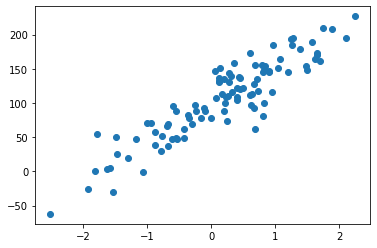

In [3]:
plt.scatter(X,y)

In [4]:
Y = coef*X + bias

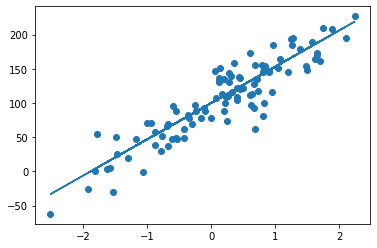

In [5]:
plt.scatter(X,y)
plt.plot(X,Y)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X,y)

LinearRegression()

In [8]:
gen_coef = model.coef_
intercept = model.intercept_

In [9]:
y_gen = X*gen_coef + intercept

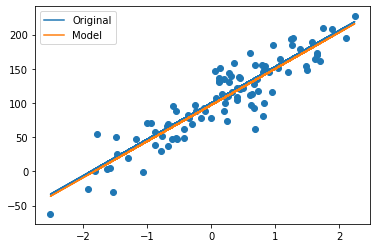

In [10]:
plt.scatter(X,y)
plt.plot(X,Y,label='Original')
plt.plot(X,y_gen,label='Model')
plt.legend()

In [11]:
class CustomRegModel:
    def __init__(self,lr=.1):
        self.lr = lr
            
    def fit(self,X,y):
        self._X = X
        self._y = y.reshape(-1,1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        Errors = []
        for x in range(50):
            self.set_gradiant()
            Errors.append(self.Error())
            
        return Errors
    
    def set_gradiant(self):
        d_coef , d_inter = self.gradiant()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_inter * self.lr
            
    def gradiant(self):
        yh = self.predict(self._X)
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_inter = (yh - self._y).mean()
        
        return d_coef , d_inter
    
    def predict(self,X):
        return self.coef_*X + self.intercept_
    
    def Error(self):
        return ((self.predict(self._X)-self._y)**2).sum()
        
        
        

In [18]:
md = CustomRegModel(lr=1)

In [19]:
err = md.fit(X,y)

In [20]:
yg , inter = md.coef_ , md.intercept_

In [21]:
ygen = X*yg + inter

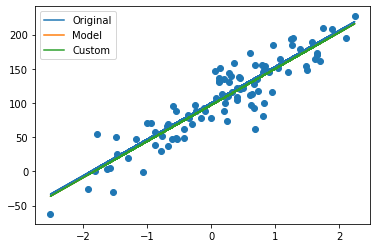

In [22]:
plt.scatter(X,y)
plt.plot(X,Y,label='Original')
plt.plot(X,y_gen,label='Model')
plt.plot(X,ygen,label='Custom')
plt.legend()

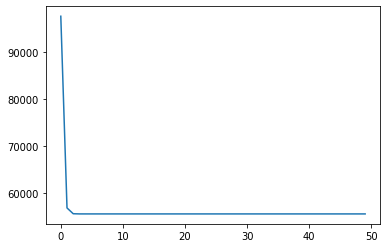

In [23]:
plt.plot(err)
    